In [1]:
import numpy as np # 线性代数
import pandas as pd # 数据处理及CSV文件的读写(例如 pd.read_csv)
import matplotlib.pyplot as plt # 常规画图
import seaborn as sns # 图形渲染好
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
# 使用内嵌模式画图
%matplotlib inline

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\grid_search.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will 

In [2]:
kobe = pd.read_csv('dataset/kobe_data.csv')
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [3]:
kobe.set_index('shot_id',inplace=True)    # 用shot_id作为索引
pd.set_option('display.max_columns',None) # 设置无列显示上限 
kobe.head(4)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


In [4]:
random_sample = kobe.take(np.random.permutation(len(kobe))[:4])
random_sample.T

shot_id,22058,2004,15975,26295
action_type,Jump Shot,Jump Shot,Jump Shot,Jump Shot
combined_shot_type,Jump Shot,Jump Shot,Jump Shot,Jump Shot
game_event_id,547,174,59,15
game_id,21500269,20100413,20900727,40000050
lat,33.9233,33.9263,33.8003,33.9973
loc_x,110,113,116,-46
loc_y,121,118,244,47
lon,-118.16,-118.157,-118.154,-118.316
minutes_remaining,0,5,4,10
period,4,2,1,1


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2160x21600 with 0 Axes>

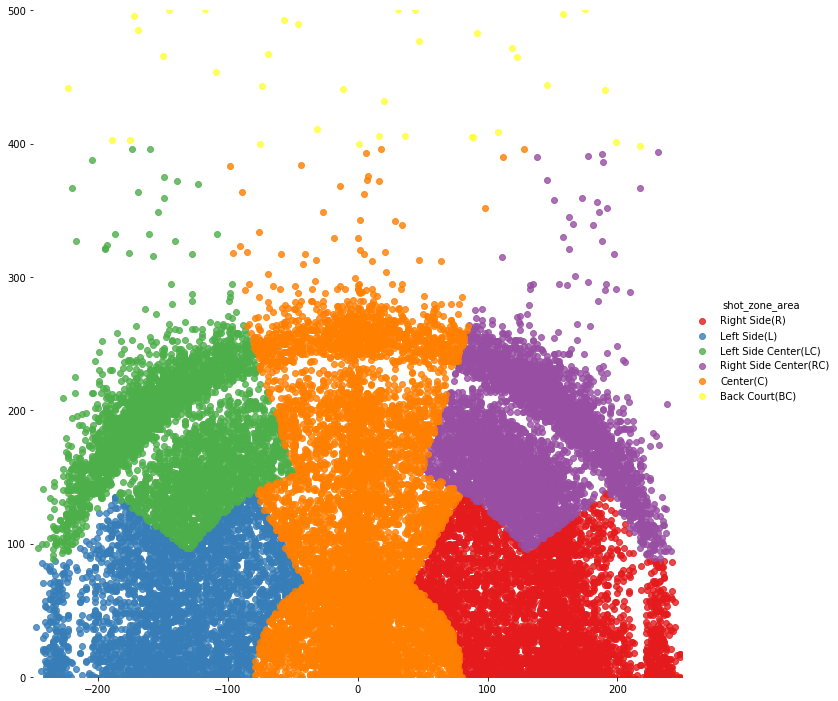

<Figure size 2160x21600 with 0 Axes>

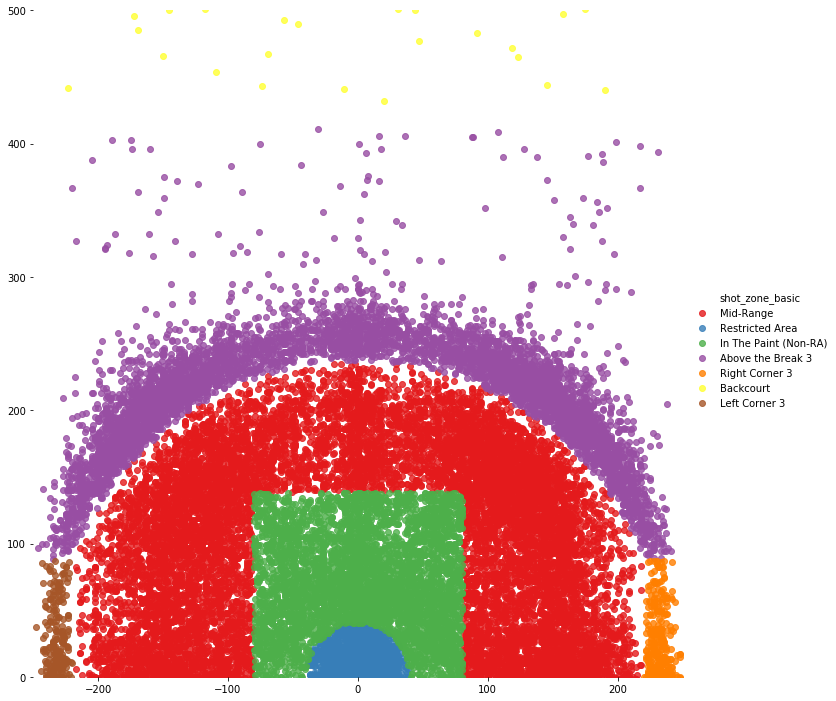

<Figure size 2160x21600 with 0 Axes>

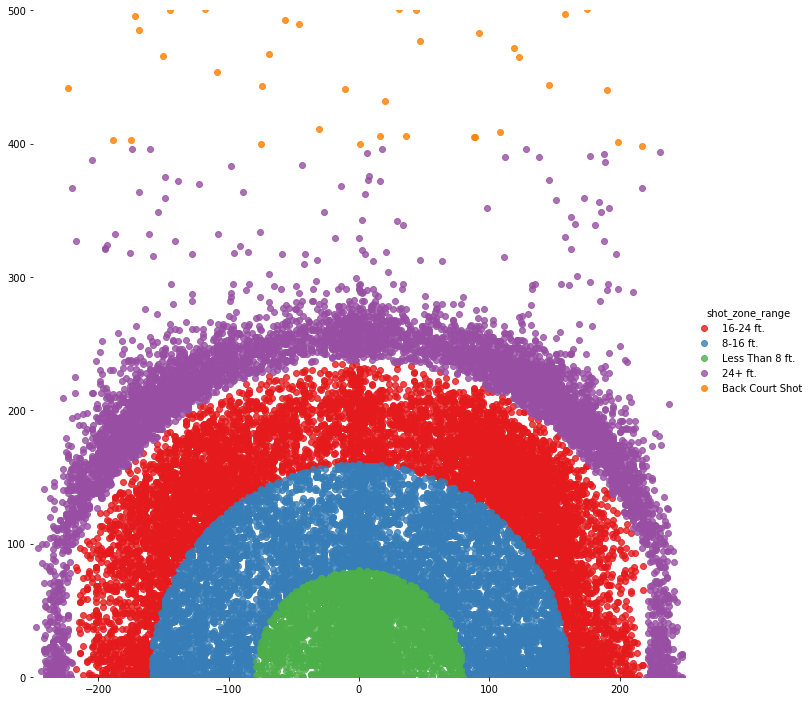

In [5]:
shot_zone = ['shot_zone_area', 'shot_zone_basic', 'shot_zone_range']
for zone in shot_zone:
    plt.figure(figsize=[30,300])
    sns.lmplot('loc_x','loc_y', 
               data=kobe, 
               hue=zone,
               fit_reg=False,
               palette="Set1",
               size=10,
              )
    plt.xlim([-250,250])
    plt.ylim([0,500])
    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left=True,bottom=True)

In [6]:
kobe.drop('team_id',axis=1,inplace=True) #只存在一个值
kobe.drop('game_id',axis=1,inplace=True) #与投篮命中与否明显无关
kobe.drop('game_event_id',axis=1,inplace=True) #与投篮命中与否明显无关
kobe.drop('team_name',axis=1,inplace=True) #只存在一个值”Los Angeles Lakers“

In [7]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 1 to 30697
Data columns (total 20 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
game_date             30697 non-null object
matchup               30697 non-null object
opponent              30697 non-null object
dtypes: float64

In [8]:
# 数值型变量的描述性统计信息
kobe.describe(include=['number']).T

,count,mean,std,min,25%,50%,75%,max
lat,30697.0,33.953192,0.087791,33.2533,33.8843,33.9703,34.0403,34.0883
loc_x,30697.0,7.110499,110.124578,-250.0000,-68.0000,0.0000,95.0000,248.0000
loc_y,30697.0,91.107535,87.791361,-44.0000,4.0000,74.0000,160.0000,791.0000
lon,30697.0,-118.262690,0.110125,-118.5198,-118.3378,-118.2698,-118.1748,-118.0218
minutes_remaining,30697.0,4.885624,3.449897,0.0000,2.0000,5.0000,8.0000,11.0000
period,30697.0,2.519432,1.153665,1.0000,1.0000,3.0000,3.0000,7.0000
playoffs,30697.0,0.146562,0.353674,0.0000,0.0000,0.0000,0.0000,1.0000
seconds_remaining,30697.0,28.365085,17.478949,0.0000,13.0000,28.0000,43.0000,59.0000
shot_distance,30697.0,13.437437,9.374189,0.0000,5.0000,15.0000,21.0000,79.0000
shot_made_flag,25697.0,0.446161,0.497103,0.0000,0.0000,0.0000,1.0000,1.0000


In [9]:
# 名义型变量的描述性统计信息
kobe.describe(include=['object']).T

,count,unique,top,freq
action_type,30697,57,Jump Shot,18880
combined_shot_type,30697,6,Jump Shot,23485
season,30697,20,2005-06,2318
shot_type,30697,2,2PT Field Goal,24271
shot_zone_area,30697,6,Center(C),13455
shot_zone_basic,30697,7,Mid-Range,12625
shot_zone_range,30697,5,Less Than 8 ft.,9398
game_date,30697,1559,2016-04-13,50
matchup,30697,74,LAL @ SAS,1020
opponent,30697,33,SAS,1978


Text(0.5, 1.0, 'Target class distribution')

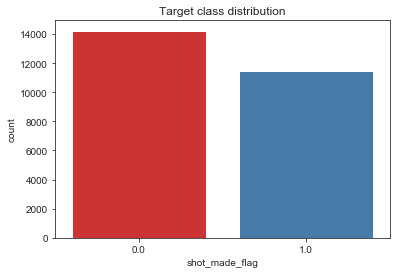

In [10]:
sns.set_style('ticks')       # 显示刻度，并取消网格
sns.set_palette('Set1')      # 配色使用Set1
ax = plt.axes() 
sns.countplot(x='shot_made_flag',
              data=kobe,
              ax=ax) 
ax.set_title('Target class distribution')

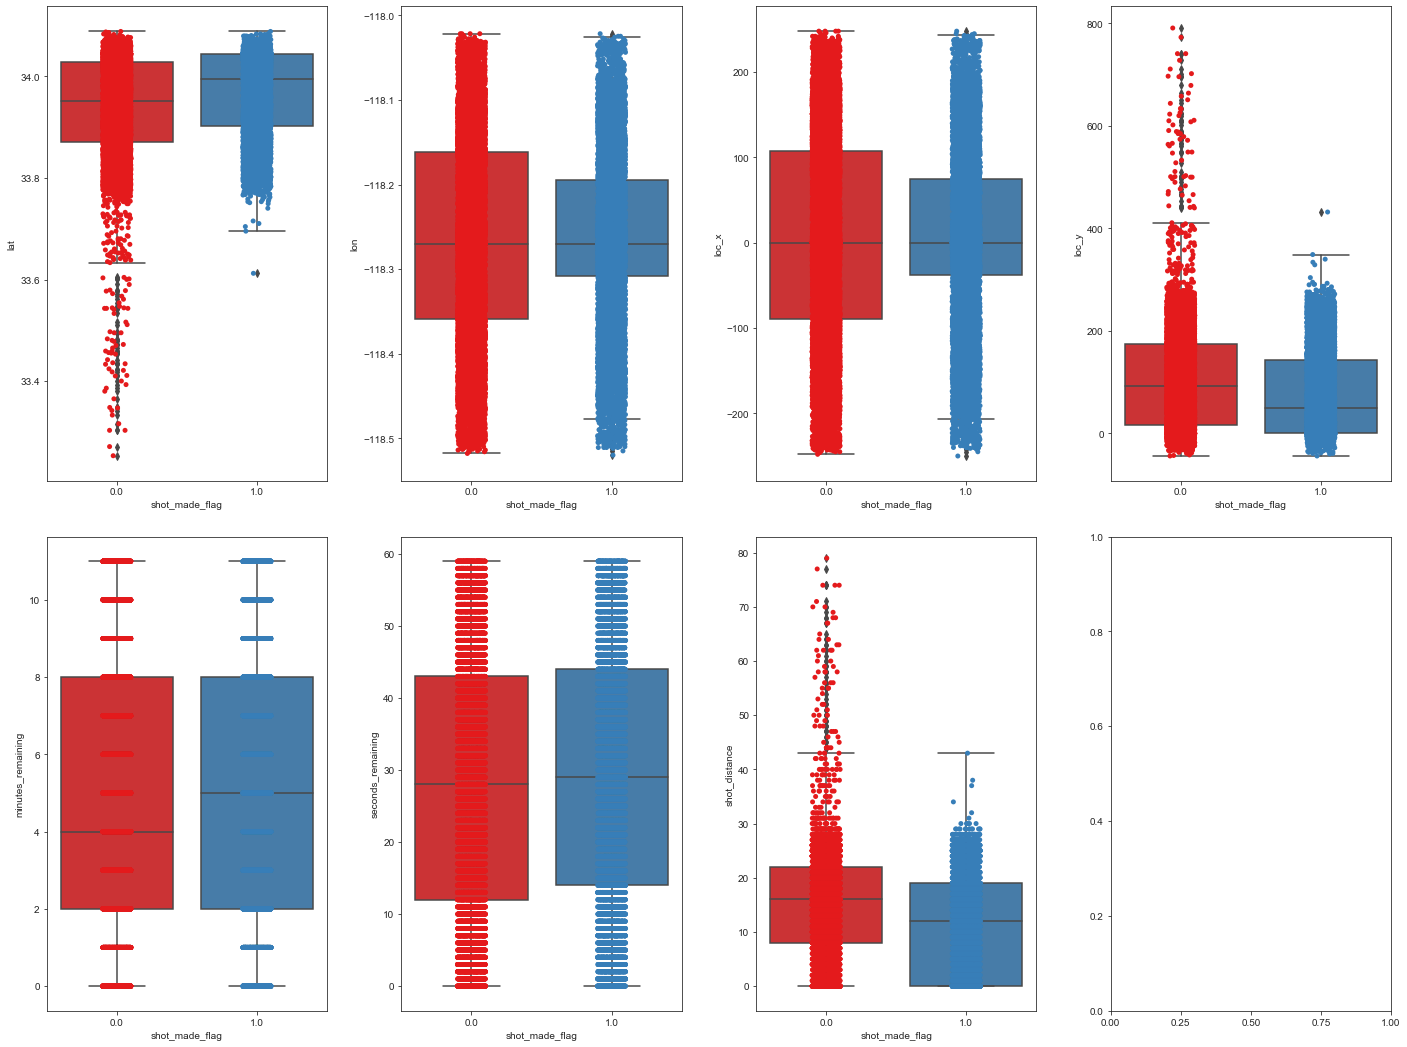

In [11]:
f,axarr = plt.subplots(2,4,figsize=(20,15))
sns.set_context("notebook", font_scale=1.8) # 放大横纵坐标标记，更容易看清
sns.stripplot(x='shot_made_flag',y='lat',data=kobe,jitter=True,ax=axarr[0,0])
sns.boxplot(x='shot_made_flag',y='lat',data=kobe,ax=axarr[0,0])
sns.stripplot(x='shot_made_flag',y='lon',data=kobe,jitter=True,ax=axarr[0,1])
sns.boxplot(x='shot_made_flag',y='lon',data=kobe,ax=axarr[0,1])
sns.stripplot(x='shot_made_flag',y='loc_x',data=kobe,jitter=True,ax=axarr[0,2])
sns.boxplot(x='shot_made_flag',y='loc_x',data=kobe,ax=axarr[0,2])
sns.stripplot(x='shot_made_flag',y='loc_y',data=kobe,jitter=True,ax=axarr[0,3])
sns.boxplot(x='shot_made_flag',y='loc_y',data=kobe,ax=axarr[0,3])
sns.stripplot(x='shot_made_flag',y='minutes_remaining',data=kobe,jitter=True,ax=axarr[1,0])
sns.boxplot(x='shot_made_flag',y='minutes_remaining',data=kobe,ax=axarr[1,0])
sns.stripplot(x='shot_made_flag',y='seconds_remaining',data=kobe,jitter=True,ax=axarr[1,1])
sns.boxplot(x='shot_made_flag',y='seconds_remaining',data=kobe,ax=axarr[1,1])
sns.stripplot(x='shot_made_flag',y='shot_distance',data=kobe,jitter=True,ax=axarr[1,2])
sns.boxplot(x='shot_made_flag',y='shot_distance',data=kobe,ax=axarr[1,2])
plt.tight_layout()

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


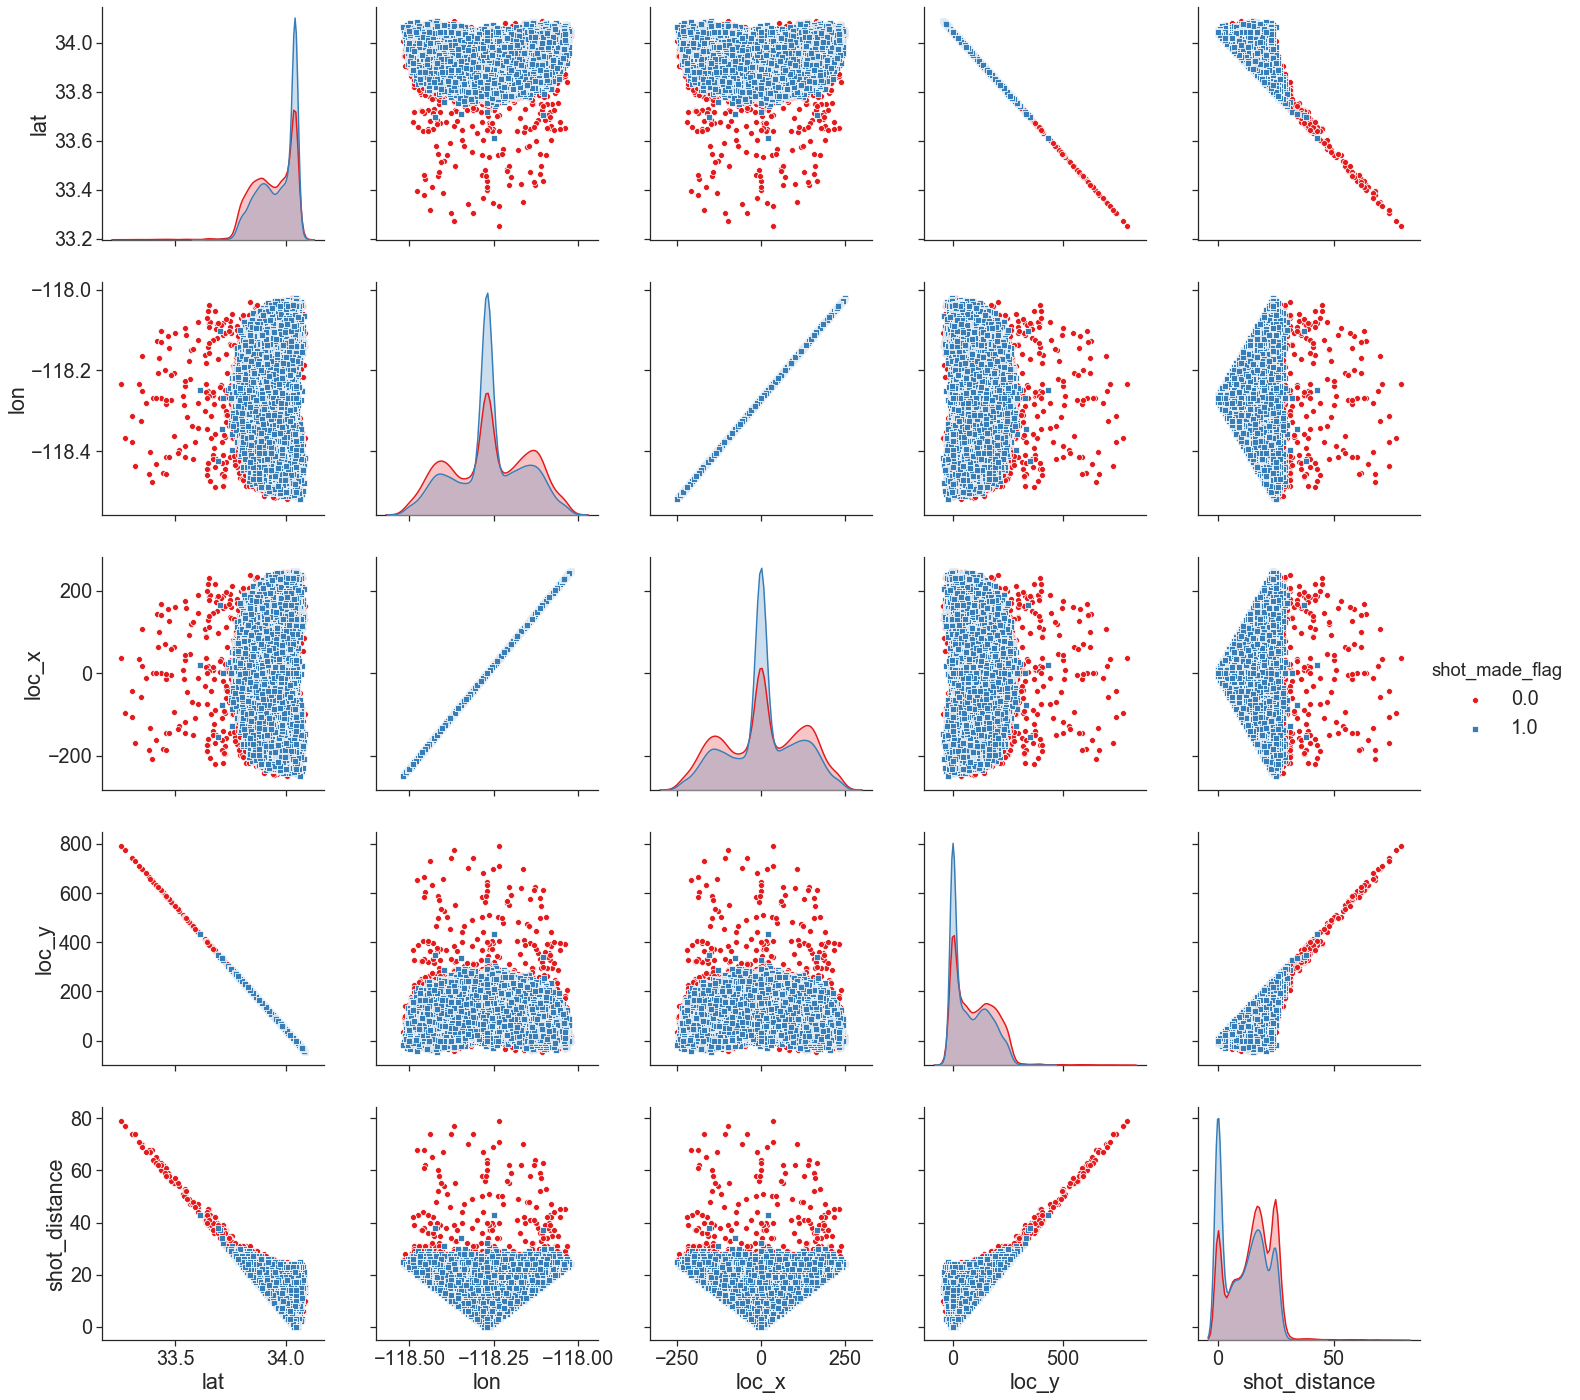

In [12]:
sns.pairplot(kobe,
             vars = ['lat','lon','loc_x','loc_y','shot_distance'],
             hue='shot_made_flag',
             markers=['o','s'],
             diag_kind='kde',
             diag_kws=dict(shade=True),
             size=4)

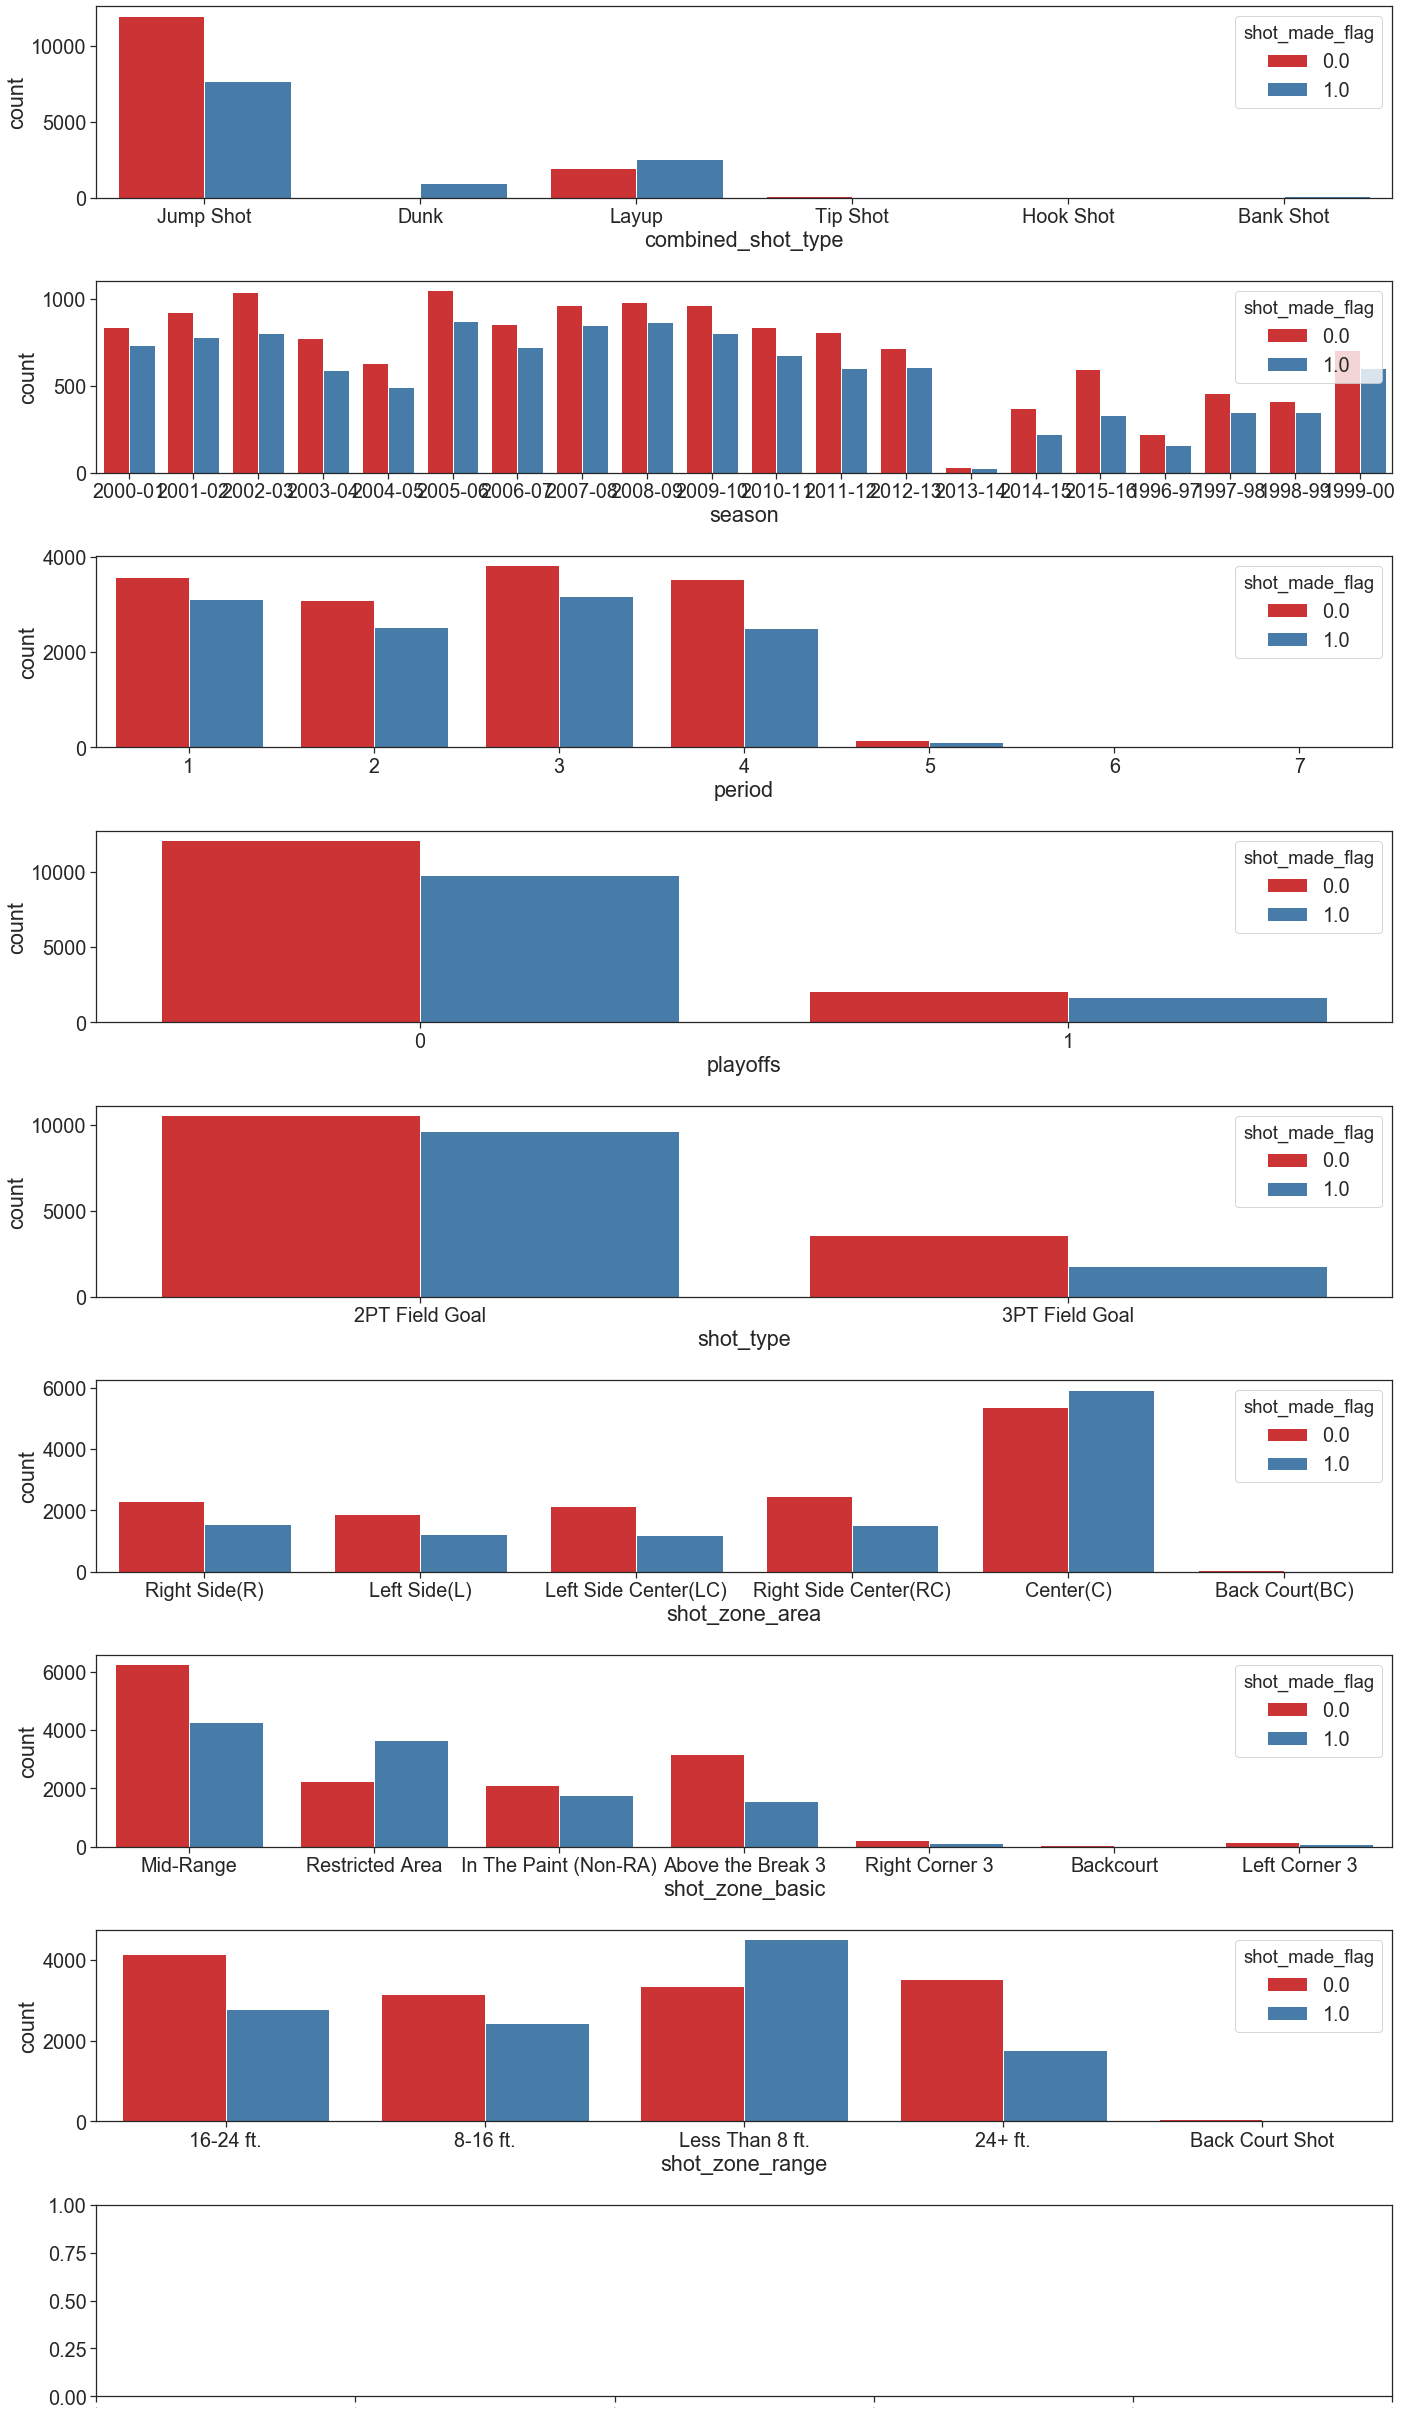

In [13]:
f, axarr = plt.subplots(9, figsize=(20, 34))
plt.xticks(fontsize=0.1)
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=kobe, ax=axarr[0])
sns.countplot(x="season", hue="shot_made_flag", data=kobe, ax=axarr[1])
sns.countplot(x="period", hue="shot_made_flag", data=kobe, ax=axarr[2])
sns.countplot(x="playoffs", hue="shot_made_flag", data=kobe, ax=axarr[3])
sns.countplot(x="shot_type", hue="shot_made_flag", data=kobe, ax=axarr[4])
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=kobe, ax=axarr[5])
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=kobe, ax=axarr[6])
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=kobe, ax=axarr[7])
plt.tight_layout()
plt.show()

In [14]:
unknown_mask = kobe['shot_made_flag'].isnull()

In [15]:
kobe_cl = kobe.copy()   #创建一份拷贝
target = kobe_cl['shot_made_flag'].copy()

#去掉一些列
kobe_cl.drop('lat',axis=1,inplace=True) #与loc_x相关
kobe_cl.drop('lon',axis=1,inplace=True) #与loc_y相关
kobe_cl.drop('shot_made_flag',axis=1,inplace=True) #已经存为target

In [16]:
# Remaining time
kobe_cl['seconds_from_period_end'] = 60 * kobe_cl['minutes_remaining'] + kobe_cl['seconds_remaining']
kobe_cl['last_5_sec_in_period'] = kobe_cl['seconds_from_period_end'] < 5

kobe_cl.drop('minutes_remaining', axis=1, inplace=True)
kobe_cl.drop('seconds_remaining', axis=1, inplace=True)
kobe_cl.drop('seconds_from_period_end', axis=1, inplace=True)

## Matchup - (away/home)
kobe_cl['home_play'] = kobe_cl['matchup'].str.contains('vs').astype('int')
kobe_cl.drop('matchup', axis=1, inplace=True)

# Game date
kobe_cl['game_date'] = pd.to_datetime(kobe_cl['game_date'])
kobe_cl['game_year'] = kobe_cl['game_date'].dt.year
kobe_cl['game_month'] = kobe_cl['game_date'].dt.month
kobe_cl.drop('game_date', axis=1, inplace=True)

# Loc_x, and loc_y binning
kobe_cl['loc_x'] = pd.cut(kobe_cl['loc_x'], 25)
kobe_cl['loc_y'] = pd.cut(kobe_cl['loc_y'], 25)

# Replace 20 least common action types with value 'Other'
rare_action_types = kobe_cl['action_type'].value_counts().sort_values().index.values[:20]
kobe_cl.loc[kobe_cl['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

In [17]:
categorial_cols = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent','loc_x', 'loc_y']

for cc in categorial_cols:
    dummies = pd.get_dummies(kobe_cl[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    kobe_cl.drop(cc, axis=1, inplace=True)
    kobe_cl = kobe_cl.join(dummies)

In [18]:
random_sample = kobe_cl.take(np.random.permutation(len(kobe_cl))[:4])
random_sample.T

shot_id,30272,12124,23207,15947
playoffs,1,0,0,0
shot_distance,0,25,0,10
last_5_sec_in_period,False,False,False,False
home_play,1,0,1,0
action_type#Alley Oop Dunk Shot,0,0,0,0
action_type#Alley Oop Layup shot,0,0,0,0
action_type#Driving Dunk Shot,0,0,0,0
action_type#Driving Finger Roll Layup Shot,0,0,0,0
action_type#Driving Finger Roll Shot,0,0,0,0
action_type#Driving Jump shot,0,0,0,0


In [19]:
kobe_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 1 to 30697
Columns: 208 entries, playoffs to loc_y#(757.6, 791.0]
dtypes: bool(1), int32(1), int64(2), uint8(204)
memory usage: 8.1 MB


In [20]:
# 划分测试集
kobe_submit = kobe_cl[unknown_mask]

# 划分训练集
X = kobe_cl[~unknown_mask]
Y = target[~unknown_mask]

In [21]:
threshold = 0.90
vt = VarianceThreshold().fit(X)
# 列出特征名
feat_var_threshold = kobe_cl.columns[vt.variances_ > threshold * (1-threshold)]
list(feat_var_threshold)

['playoffs',
 'shot_distance',
 'home_play',
 'action_type#Jump Shot',
 'combined_shot_type#Jump Shot',
 'combined_shot_type#Layup',
 'period#1',
 'period#2',
 'period#3',
 'period#4',
 'shot_type#2PT Field Goal',
 'shot_type#3PT Field Goal',
 'shot_zone_area#Center(C)',
 'shot_zone_area#Left Side Center(LC)',
 'shot_zone_area#Left Side(L)',
 'shot_zone_area#Right Side Center(RC)',
 'shot_zone_area#Right Side(R)',
 'shot_zone_basic#Above the Break 3',
 'shot_zone_basic#In The Paint (Non-RA)',
 'shot_zone_basic#Mid-Range',
 'shot_zone_basic#Restricted Area',
 'shot_zone_range#16-24 ft.',
 'shot_zone_range#24+ ft.',
 'shot_zone_range#8-16 ft.',
 'shot_zone_range#Less Than 8 ft.',
 'game_month#1',
 'game_month#2',
 'game_month#3',
 'game_month#4',
 'game_month#11',
 'game_month#12',
 'loc_x#(-10.96, 8.96]',
 'loc_y#(-10.6, 22.8]',
 'loc_y#(22.8, 56.2]',
 'loc_y#(123.0, 156.4]']

In [22]:
print(len(feat_var_threshold))

35


In [23]:
model = RandomForestClassifier()
model.fit(X, Y)

feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])
feat_rf_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
list(feat_rf_20)

['shot_distance',
 'action_type#Jump Shot',
 'home_play',
 'combined_shot_type#Dunk',
 'period#1',
 'period#2',
 'period#3',
 'period#4',
 'action_type#Layup Shot',
 'game_month#1',
 'game_month#3',
 'game_month#12',
 'game_month#2',
 'game_month#4',
 'game_month#11',
 'playoffs',
 'opponent#SAS',
 'opponent#HOU',
 'opponent#POR',
 'opponent#DEN']

In [24]:
#首先对变量进行0-1标准化
X_minmax = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, Y)
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })
feat_chi2_20 = feature_scoring.sort_values('score', ascending=False).head(20)['feature'].values
list(feat_chi2_20)

['combined_shot_type#Dunk',
 'action_type#Jump Shot',
 'shot_zone_basic#Restricted Area',
 'loc_x#(-10.96, 8.96]',
 'action_type#Driving Layup Shot',
 'shot_zone_range#Less Than 8 ft.',
 'loc_y#(-10.6, 22.8]',
 'action_type#Slam Dunk Shot',
 'shot_type#3PT Field Goal',
 'action_type#Driving Dunk Shot',
 'shot_zone_area#Center(C)',
 'action_type#Running Jump Shot',
 'shot_zone_range#24+ ft.',
 'shot_zone_basic#Above the Break 3',
 'combined_shot_type#Layup',
 'combined_shot_type#Jump Shot',
 'last_5_sec_in_period',
 'action_type#Jump Bank Shot',
 'action_type#Pullup Jump shot',
 'shot_zone_area#Left Side Center(LC)']

In [25]:
rfe = RFE(LogisticRegression(), 20)
rfe.fit(X, Y)
feature_rfe_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': rfe.ranking_
    })
feat_rfe_20 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
list(feat_rfe_20)

['action_type#Driving Dunk Shot',
 'action_type#Driving Finger Roll Layup Shot',
 'action_type#Driving Finger Roll Shot',
 'action_type#Driving Slam Dunk Shot',
 'action_type#Dunk Shot',
 'action_type#Fadeaway Bank shot',
 'action_type#Finger Roll Shot',
 'action_type#Hook Shot',
 'action_type#Jump Shot',
 'action_type#Layup Shot',
 'action_type#Running Bank shot',
 'action_type#Running Hook Shot',
 'action_type#Slam Dunk Shot',
 'combined_shot_type#Dunk',
 'combined_shot_type#Tip Shot',
 'shot_zone_area#Back Court(BC)',
 'shot_zone_range#Back Court Shot',
 'loc_y#(290.0, 323.4]',
 'loc_y#(356.8, 390.2]',
 'loc_y#(390.2, 423.6]']

In [26]:
feature_scoring = pd.DataFrame({
        'feat_rf_20': feat_rf_20,
        'feat_chi2_20': feat_chi2_20,
        'feat_rfe_20': feat_rfe_20
    })
feature_scoring

,feat_rf_20,feat_chi2_20,feat_rfe_20
0,shot_distance,combined_shot_type#Dunk,action_type#Driving Dunk Shot
1,action_type#Jump Shot,action_type#Jump Shot,action_type#Driving Finger Roll Layup Shot
2,home_play,shot_zone_basic#Restricted Area,action_type#Driving Finger Roll Shot
3,combined_shot_type#Dunk,"loc_x#(-10.96, 8.96]",action_type#Driving Slam Dunk Shot
4,period#1,action_type#Driving Layup Shot,action_type#Dunk Shot
5,period#2,shot_zone_range#Less Than 8 ft.,action_type#Fadeaway Bank shot
6,period#3,"loc_y#(-10.6, 22.8]",action_type#Finger Roll Shot
7,period#4,action_type#Slam Dunk Shot,action_type#Hook Shot
8,action_type#Layup Shot,shot_type#3PT Field Goal,action_type#Jump Shot
9,game_month#1,action_type#Driving Dunk Shot,action_type#Layup Shot


In [27]:
print(feat_rf_20.shape)

(20,)


In [28]:
features = np.hstack([
        feat_var_threshold, 
        feat_rf_20,
        feat_chi2_20,
        feat_rfe_20
    ])
features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("-{}".format(f))

Final features set:

-action_type#Driving Dunk Shot
-action_type#Driving Finger Roll Layup Shot
-action_type#Driving Finger Roll Shot
-action_type#Driving Layup Shot
-action_type#Driving Slam Dunk Shot
-action_type#Dunk Shot
-action_type#Fadeaway Bank shot
-action_type#Finger Roll Shot
-action_type#Hook Shot
-action_type#Jump Bank Shot
-action_type#Jump Shot
-action_type#Layup Shot
-action_type#Pullup Jump shot
-action_type#Running Bank shot
-action_type#Running Hook Shot
-action_type#Running Jump Shot
-action_type#Slam Dunk Shot
-combined_shot_type#Dunk
-combined_shot_type#Jump Shot
-combined_shot_type#Layup
-combined_shot_type#Tip Shot
-game_month#1
-game_month#11
-game_month#12
-game_month#2
-game_month#3
-game_month#4
-home_play
-last_5_sec_in_period
-loc_x#(-10.96, 8.96]
-loc_y#(-10.6, 22.8]
-loc_y#(123.0, 156.4]
-loc_y#(22.8, 56.2]
-loc_y#(290.0, 323.4]
-loc_y#(356.8, 390.2]
-loc_y#(390.2, 423.6]
-opponent#DEN
-opponent#HOU
-opponent#POR
-opponent#SAS
-period#1
-period#2
-period#

In [29]:
kobe_cl = kobe_cl.ix[:, features]
kobe_submit = kobe_submit.ix[:, features]
X = X.ix[:, features]

print('完整数据集shape: {}'.format(kobe_cl.shape))
print('测试集shape: {}'.format(kobe_submit.shape))
print('训练集shape: {}'.format(X.shape))
print('目标标签shape: {}'.format(Y.shape))

完整数据集shape: (30697, 63)
测试集shape: (5000, 63)
训练集shape: (25697, 63)
目标标签shape: (25697,)


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [30]:
components = 8
pca = PCA(n_components = components).fit(X)

Text(0.5, 1.0, 'PCA - Variance explained')

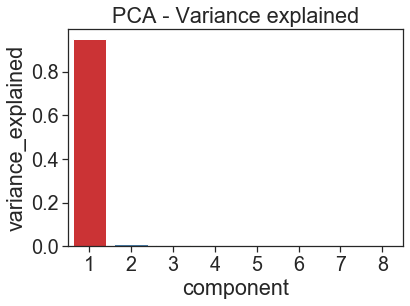

In [31]:
pca_variance_explained_df = pd.DataFrame({
    "component": np.arange(1, components+1),
    "variance_explained": pca.explained_variance_ratio_            
    })
ax = sns.barplot(x='component', 
                 y='variance_explained', 
                 data=pca_variance_explained_df,
                 palette="Set1", )
ax.set_title("PCA - Variance explained")

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


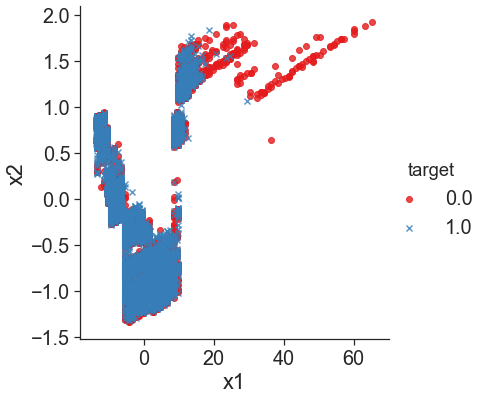

In [32]:
X_pca = pd.DataFrame(pca.transform(X)[:,:2])
X_pca['target'] = Y.values
X_pca.columns = ["x1", "x2", "target"]
sns.lmplot('x1','x2', 
           data=X_pca, 
           hue="target", 
           fit_reg=False, 
           markers=["o", "x"], 
           palette="Set1", 
           size=6,
          )

In [33]:
seed = 7
processors=1
num_folds=3           #三折交叉验证
num_instances=len(X)
scoring='roc_auc'     #交叉验证的分数为AUC
kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)

In [34]:
model = AdaBoostClassifier(n_estimators=100, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.697) +/- (0.003)


In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=150,min_samples_leaf=6)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.694) +/- (0.002)


In [36]:
# 模型包括逻辑回归、线性判别分析、K近邻、决策树和朴素贝叶斯
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier(min_samples_leaf=6)))
models.append(('NB', GaussianNB()))
# 对每个模型计算其cross_cal_score
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc', n_jobs=processors)
    results.append(cv_results)
    names.append(name)
    print("{0}: ({1:.3f}) +/- ({2:.3f})".format(name, cv_results.mean(), cv_results.std()))

LR: (0.694) +/- (0.004)


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: (0.694) +/- (0.005)
K-NN: (0.619) +/- (0.015)
CART: (0.650) +/- (0.006)
NB: (0.661) +/- (0.006)


In [52]:
rf_grid = GridSearchCV(
    estimator = RandomForestClassifier(random_state=seed),
    param_grid = {
        'n_estimators': list(range(1,200,30)),
        'min_samples_leaf': list(range(1,30,2))
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)
rf_grid.fit(X, Y)
print(rf_grid.best_score_)
print(rf_grid.best_params_)

0.6978762422993122
{'min_samples_leaf': 21, 'n_estimators': 121}


In [89]:
rf = RandomForestClassifier(random_state=seed, min_samples_leaf=21, n_estimators=121, oob_score=True)
rf_model = rf.fit(X,Y)
train_scores = rf_model.oob_decision_function_

In [90]:
X.shape

(25697, 63)

In [91]:
len(train_scores)

25697

In [93]:
temp = np.argsort(train_scores[Y==0.0][:,1])
temp = temp[-10:]
train_scores[Y==0.0][temp]

array([[0.06265775, 0.93734225],
       [0.06217628, 0.93782372],
       [0.06006802, 0.93993198],
       [0.05952541, 0.94047459],
       [0.05925942, 0.94074058],
       [0.05797388, 0.94202612],
       [0.05526619, 0.94473381],
       [0.05418887, 0.94581113],
       [0.05331748, 0.94668252],
       [0.0531908 , 0.9468092 ]])

In [87]:
shot_index_rem = Y[Y==0.0].index

In [88]:
shot_index_rem[temp]

Int64Index([24671, 24144, 24232, 6493, 9716, 27076, 2290, 84, 3658, 2375], dtype='int64', name='shot_id')